<h1 style="text-align:center;">Proyecto</h1>
<hr>
<h2 style="text-align:center;">Venta de Bienes Raíces</h2>
<h3 style="text-align:center;">Universidad Castro Carazo</h3>
<h3 style="text-align:center;">2023</h3>

<ol>
    <li>Importacion de librerias</li>
    <li>Carga de Set de Datos</li>
    <li>Integracion de los Set de datos</li>
    <li>Trabajo con Valores Faltantes</li>
    <li>Normalizacion de los datos</li>
    <li>Estandarizacion de los datos</li>
    <li>Agrupacion de datos</li>
    <li>Graficado de los datos</li>
</ol>

<h2 style='color:#FF6347'>1. Importacion de Librerias</h2>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display #Para evitar que aparezca la notación científica 
pd.set_option('display.float_format', '{:.2f}'.format) #Para evitar que aparezca la notación científica 
import matplotlib.patches as mpatches

<h2 style='color:#FF6347'>2. Carge de Datos</h2>

In [2]:
cols = ["Serial Number", "List Year", "Date Recorded", "Town", "Address", 

        "Assessed Value", "Sale Amount", "Sales Ratio", "Property Type", 

        "Residential Type", "Non Use Code", "Assessor Remarks", 

        "OPM remarks", "Location"]

df_ler_Propiedades = pd.read_csv("DataSet.csv", names=cols)

C:\Users\Kevin\AppData\Local\Temp\ipykernel_4084\3351180527.py:9: DtypeWarning: Columns (0,1,5,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ler_Propiedades = pd.read_csv("DataSet.csv", names=cols)


In [3]:
df_ler_Propiedades.shape

(194725, 14)

In [4]:
df_ler_Propiedades.head(5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,202000308,2020,9/23/2021,Plymouth,85 BUSHNELL STREET,103890,170000.00,0.61,Residential,Single Family,NaN,NaN,NaN,NaN
1,202000303,2020,9/21/2021,Plymouth,74 WATCH TOWER ROAD,194770,348950.00,0.56,Residential,Single Family,NaN,NaN,NaN,NaN
2,202000297,2020,9/7/2021,Plymouth,12 KIMANN DRIVE,135850,185000.00,0.73,Residential,Single Family,NaN,NaN,NaN,NaN
3,202000293,2020,9/3/2021,Plymouth,128 E WASHINGTON ROAD,113340,265000.00,0.43,Residential,Single Family,NaN,NaN,NaN,POINT (-73.00128 41.66813)
4,202000292,2020,9/2/2021,Plymouth,9 SYLVAN AVENUE,115080,265000.00,0.43,Residential,Single Family,NaN,NaN,NaN,NaN


In [5]:
df_ler_Propiedades.tail(5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
194720,20763,2002,6/17/2003,West Haven,130 JONES ST,70700,179000.00,0.39,NaN,NaN,NaN,NaN,NaN,POINT (-73.24081 41.20367)
194721,21066,2002,7/22/2003,West Hartford,15 PORTER DR,240880,515000.00,0.47,NaN,NaN,NaN,NaN,NaN,NaN
194722,30531,2003,4/15/2004,East Hartford,43 TIFFANY RD,80330,130000.00,0.62,NaN,NaN,14.00,NaN,NaN,NaN
194723,30624,2003,3/3/2004,Bristol,81 ANDREWS ST,69230,130000.00,0.53,NaN,NaN,NaN,NaN,NaN,POINT (-72.75671 41.77555)
194724,30434,2003,2/6/2004,Greenwich,57 PROSPECT ST,183470,375000.00,0.49,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_ler_Propiedades.describe()

,Sale Amount,Sales Ratio
count,194721.00,194721.00
mean,388893.56,2.67
std,11442724.36,401.09
min,0.00,0.00
25%,130000.00,0.44
50%,213700.00,0.52
75%,354900.00,0.62
max,5000000000.00,165060.00


In [7]:
df_ler_Propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194725 entries, 0 to 194724
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     194723 non-null  object 
 1   List Year         194723 non-null  object 
 2   Date Recorded     194720 non-null  object 
 3   Town              194722 non-null  object 
 4   Address           194715 non-null  object 
 5   Assessed Value    194722 non-null  object 
 6   Sale Amount       194721 non-null  float64
 7   Sales Ratio       194721 non-null  float64
 8   Property Type     61651 non-null   object 
 9   Residential Type  56348 non-null   object 
 10  Non Use Code      44112 non-null   object 
 11  Assessor Remarks  12717 non-null   object 
 12  OPM remarks       1675 non-null    object 
 13  Location          54725 non-null   object 
dtypes: float64(2), object(12)
memory usage: 20.8+ MB


<h2 style="color:#FF6347">3. Manejo de valores faltantes</h2>

In [8]:
df_ler_Propiedades.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')

In [9]:
df_ler_Propiedades.rename({'Serial Number': 'serialNumber'}, axis=1, inplace=True)
df_ler_Propiedades.rename({'List Year': 'listYear'}, axis=1, inplace=True)
df_ler_Propiedades.rename({'Date Recorded': 'dateRecorded'}, axis=1, inplace=True)
df_ler_Propiedades.rename({'Town': 'town'}, axis=1, inplace=True)
df_ler_Propiedades.rename({'Address': 'address'}, axis=1, inplace=True)
df_ler_Propiedades.rename({'Assessed Value': 'assessedValue'}, axis=1, inplace=True)
df_ler_Propiedades.rename({'Sale Amount': 'saleAmount'}, axis=1, inplace=True)
df_ler_Propiedades.rename({'Sales Ratio': 'salesRatio'}, axis=1, inplace=True)
df_ler_Propiedades.rename({'Property Type': 'propertyType'}, axis=1, inplace=True)
df_ler_Propiedades.rename({'Residential Type': 'residentialType'}, axis=1, inplace=True)
df_ler_Propiedades.rename({'Non Use Code': 'nonUseCode'}, axis=1, inplace=True)
df_ler_Propiedades.rename({'Assessor Remarks': 'assessorRemarks'}, axis=1, inplace=True)
df_ler_Propiedades.rename({'OPM remarks': 'opmRemarks'}, axis=1, inplace=True)
df_ler_Propiedades.rename({'Location': 'location'}, axis=1, inplace=True)

In [10]:
df_ler_Propiedades.columns

Index(['serialNumber', 'listYear', 'dateRecorded', 'town', 'address',
       'assessedValue', 'saleAmount', 'salesRatio', 'propertyType',
       'residentialType', 'nonUseCode', 'assessorRemarks', 'opmRemarks',
       'location'],
      dtype='object')

In [11]:
df_ler_Propiedades.replace('NaN', np.nan, inplace = True)
df_ler_Propiedades.head(5)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,opmRemarks,location
0,202000308,2020,9/23/2021,Plymouth,85 BUSHNELL STREET,103890,170000.00,0.61,Residential,Single Family,NaN,NaN,NaN,NaN
1,202000303,2020,9/21/2021,Plymouth,74 WATCH TOWER ROAD,194770,348950.00,0.56,Residential,Single Family,NaN,NaN,NaN,NaN
2,202000297,2020,9/7/2021,Plymouth,12 KIMANN DRIVE,135850,185000.00,0.73,Residential,Single Family,NaN,NaN,NaN,NaN
3,202000293,2020,9/3/2021,Plymouth,128 E WASHINGTON ROAD,113340,265000.00,0.43,Residential,Single Family,NaN,NaN,NaN,POINT (-73.00128 41.66813)
4,202000292,2020,9/2/2021,Plymouth,9 SYLVAN AVENUE,115080,265000.00,0.43,Residential,Single Family,NaN,NaN,NaN,NaN


In [12]:
dfTemp=df_ler_Propiedades.isnull()
dfTemp.head(5)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,opmRemarks,location
0,False,False,False,False,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,True,True,True,True


In [13]:
for column in dfTemp.columns.values.tolist():
    print(column)
    print(dfTemp[column].value_counts())
    print("")

serialNumber
False    194723
True          2
Name: serialNumber, dtype: int64

listYear
False    194723
True          2
Name: listYear, dtype: int64

dateRecorded
False    194720
True          5
Name: dateRecorded, dtype: int64

town
False    194722
True          3
Name: town, dtype: int64

address
False    194715
True         10
Name: address, dtype: int64

assessedValue
False    194722
True          3
Name: assessedValue, dtype: int64

saleAmount
False    194721
True          4
Name: saleAmount, dtype: int64

salesRatio
False    194721
True          4
Name: salesRatio, dtype: int64

propertyType
True     133074
False     61651
Name: propertyType, dtype: int64

residentialType
True     138377
False     56348
Name: residentialType, dtype: int64

nonUseCode
True     150613
False     44112
Name: nonUseCode, dtype: int64

assessorRemarks
True     182008
False     12717
Name: assessorRemarks, dtype: int64

opmRemarks
True     193050
False      1675
Name: opmRemarks, dtype: int64

location


In [14]:
df_ler_Propiedades.drop(columns=['nonUseCode', 'assessorRemarks', 'opmRemarks', 'location'], inplace=True)

In [15]:
df_ler_Propiedades.head(5)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType
0,202000308,2020,9/23/2021,Plymouth,85 BUSHNELL STREET,103890,170000.00,0.61,Residential,Single Family
1,202000303,2020,9/21/2021,Plymouth,74 WATCH TOWER ROAD,194770,348950.00,0.56,Residential,Single Family
2,202000297,2020,9/7/2021,Plymouth,12 KIMANN DRIVE,135850,185000.00,0.73,Residential,Single Family
3,202000293,2020,9/3/2021,Plymouth,128 E WASHINGTON ROAD,113340,265000.00,0.43,Residential,Single Family
4,202000292,2020,9/2/2021,Plymouth,9 SYLVAN AVENUE,115080,265000.00,0.43,Residential,Single Family


In [16]:
df_ler_Propiedades.replace(' ', None, inplace=True)

In [17]:
df_ler_Propiedades.head(5)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType
0,202000308,2020,9/23/2021,Plymouth,85 BUSHNELL STREET,103890,170000.00,0.61,Residential,Single Family
1,202000303,2020,9/21/2021,Plymouth,74 WATCH TOWER ROAD,194770,348950.00,0.56,Residential,Single Family
2,202000297,2020,9/7/2021,Plymouth,12 KIMANN DRIVE,135850,185000.00,0.73,Residential,Single Family
3,202000293,2020,9/3/2021,Plymouth,128 E WASHINGTON ROAD,113340,265000.00,0.43,Residential,Single Family
4,202000292,2020,9/2/2021,Plymouth,9 SYLVAN AVENUE,115080,265000.00,0.43,Residential,Single Family


<h2 style="color:#FF6347">4. Estandarizacion de datos</h2>

In [18]:
av_saleAmount = df_ler_Propiedades["saleAmount"].astype("float").mean(axis=0)
av_salesRatio = df_ler_Propiedades["salesRatio"].astype("float").mean(axis=0)

In [19]:
df_ler_Propiedades["saleAmount"].replace(np.nan,av_saleAmount, inplace = True)
df_ler_Propiedades["salesRatio"].replace(np.nan,av_salesRatio, inplace = True)
df_ler_Propiedades.head(5)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType
0,202000308,2020,9/23/2021,Plymouth,85 BUSHNELL STREET,103890,170000.00,0.61,Residential,Single Family
1,202000303,2020,9/21/2021,Plymouth,74 WATCH TOWER ROAD,194770,348950.00,0.56,Residential,Single Family
2,202000297,2020,9/7/2021,Plymouth,12 KIMANN DRIVE,135850,185000.00,0.73,Residential,Single Family
3,202000293,2020,9/3/2021,Plymouth,128 E WASHINGTON ROAD,113340,265000.00,0.43,Residential,Single Family
4,202000292,2020,9/2/2021,Plymouth,9 SYLVAN AVENUE,115080,265000.00,0.43,Residential,Single Family


In [20]:
df_ler_Propiedades['assessedValue'] = df_ler_Propiedades['assessedValue'].replace('Single Family', None)

In [21]:
promSaleAmount=df_ler_Propiedades["saleAmount"].mean(axis=0)
print('La media es: ',promSaleAmount)

La media es:  388893.55557500216


In [22]:
df_ler_Propiedades['assessedValue'] = df_ler_Propiedades['assessedValue'].astype(float)

In [23]:
promAssessedValue=df_ler_Propiedades["assessedValue"].astype("float").mean(axis=0)
print('La media es: ',promAssessedValue)

La media es:  218700.39880136194


In [24]:
dfTemp=df_ler_Propiedades.isnull()
dfTemp.head(5)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [25]:
df_ler_Propiedades.describe()

,assessedValue,saleAmount,salesRatio
count,194721.00,194725.00,194725.00
mean,218700.40,388893.56,2.67
std,1131255.05,11442606.84,401.08
min,0.00,0.00,0.00
25%,68670.00,130000.00,0.44
50%,109000.00,213750.00,0.52
75%,185850.00,354900.00,0.62
max,87888480.00,5000000000.00,165060.00


In [26]:
df_ler_Propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194725 entries, 0 to 194724
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   serialNumber     194723 non-null  object 
 1   listYear         194723 non-null  object 
 2   dateRecorded     194720 non-null  object 
 3   town             194722 non-null  object 
 4   address          194715 non-null  object 
 5   assessedValue    194721 non-null  float64
 6   saleAmount       194725 non-null  float64
 7   salesRatio       194725 non-null  float64
 8   propertyType     61651 non-null   object 
 9   residentialType  56348 non-null   object 
dtypes: float64(3), object(7)
memory usage: 14.9+ MB


In [27]:
df_ler_Propiedades.head(5)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType
0,202000308,2020,9/23/2021,Plymouth,85 BUSHNELL STREET,103890.00,170000.00,0.61,Residential,Single Family
1,202000303,2020,9/21/2021,Plymouth,74 WATCH TOWER ROAD,194770.00,348950.00,0.56,Residential,Single Family
2,202000297,2020,9/7/2021,Plymouth,12 KIMANN DRIVE,135850.00,185000.00,0.73,Residential,Single Family
3,202000293,2020,9/3/2021,Plymouth,128 E WASHINGTON ROAD,113340.00,265000.00,0.43,Residential,Single Family
4,202000292,2020,9/2/2021,Plymouth,9 SYLVAN AVENUE,115080.00,265000.00,0.43,Residential,Single Family


In [28]:
df_ler_Propiedades
df_ler_Propiedades

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType
0,202000308,2020,9/23/2021,Plymouth,85 BUSHNELL STREET,103890.00,170000.00,0.61,Residential,Single Family
1,202000303,2020,9/21/2021,Plymouth,74 WATCH TOWER ROAD,194770.00,348950.00,0.56,Residential,Single Family
2,202000297,2020,9/7/2021,Plymouth,12 KIMANN DRIVE,135850.00,185000.00,0.73,Residential,Single Family
3,202000293,2020,9/3/2021,Plymouth,128 E WASHINGTON ROAD,113340.00,265000.00,0.43,Residential,Single Family
4,202000292,2020,9/2/2021,Plymouth,9 SYLVAN AVENUE,115080.00,265000.00,0.43,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
194720,20763,2002,6/17/2003,West Haven,130 JONES ST,70700.00,179000.00,0.39,NaN,NaN
194721,21066,2002,7/22/2003,West Hartford,15 PORTER DR,240880.00,515000.00,0.47,NaN,NaN
194722,30531,2003,4/15/2004,East Hartford,43 TIFFANY RD,80330.00,130000.00,0.62,NaN,NaN
194723,30624,2003,3/3/2004,Bristol,81 ANDREWS ST,69230.00,130000.00,0.53,NaN,NaN


In [29]:
dfassessedValue = df_ler_Propiedades["assessedValue"]
dfassessedValue.describe()

count     194721.00
mean      218700.40
std      1131255.05
min            0.00
25%        68670.00
50%       109000.00
75%       185850.00
max     87888480.00
Name: assessedValue, dtype: float64

In [30]:
dflistYear = df_ler_Propiedades["listYear"]
dflistYear.describe()

count     194723
unique        23
top         2020
freq       61353
Name: listYear, dtype: object

In [31]:
dftown = df_ler_Propiedades["town"]
dftown.describe()

count       194722
unique         170
top       Stamford
freq          7785
Name: town, dtype: object

In [32]:
dfpropertyType = df_ler_Propiedades["propertyType"]
dfpropertyType.describe()

count           61651
unique             10
top       Residential
freq            56049
Name: propertyType, dtype: object

In [33]:
dfresidentialType = df_ler_Propiedades["residentialType"]
dfresidentialType.describe()

count             56348
unique                5
top       Single Family
freq              39919
Name: residentialType, dtype: object

In [34]:
dfsalesRatio = df_ler_Propiedades["salesRatio"]
dfsalesRatio.describe()

count   194725.00
mean         2.67
std        401.08
min          0.00
25%          0.44
50%          0.52
75%          0.62
max     165060.00
Name: salesRatio, dtype: float64

In [35]:
df_ler_Propiedades.head(5)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType
0,202000308,2020,9/23/2021,Plymouth,85 BUSHNELL STREET,103890.00,170000.00,0.61,Residential,Single Family
1,202000303,2020,9/21/2021,Plymouth,74 WATCH TOWER ROAD,194770.00,348950.00,0.56,Residential,Single Family
2,202000297,2020,9/7/2021,Plymouth,12 KIMANN DRIVE,135850.00,185000.00,0.73,Residential,Single Family
3,202000293,2020,9/3/2021,Plymouth,128 E WASHINGTON ROAD,113340.00,265000.00,0.43,Residential,Single Family
4,202000292,2020,9/2/2021,Plymouth,9 SYLVAN AVENUE,115080.00,265000.00,0.43,Residential,Single Family


In [36]:
dfsaleAmount = df_ler_Propiedades["saleAmount"]
dfsaleAmount.describe()

count       194725.00
mean        388893.56
std       11442606.84
min              0.00
25%         130000.00
50%         213750.00
75%         354900.00
max     5000000000.00
Name: saleAmount, dtype: float64

In [37]:
print(df_ler_Propiedades.iloc[424])

serialNumber                    20000241
listYear                            2020
dateRecorded                   8/16/2021
town                              Granby
address            33 CIDER MILL HEIGHTS
assessedValue                   85750.00
saleAmount                     130000.00
salesRatio                          0.66
propertyType                 Vacant Land
residentialType                      NaN
Name: 424, dtype: object


In [38]:
propIncome = df_ler_Propiedades.groupby(['propertyType'])['saleAmount'].mean()

In [39]:
propIncome.head(6)

propertyType
Apartments       13705144.90
Commercial        1755517.07
Condo              224094.40
Industrial        1896562.27
Public Utility     112136.00
Residential        487167.00
Name: saleAmount, dtype: float64

<h2 style="color: #FF6347">5. Visualización de Datos</h2>

In [40]:
mpl.rcParams["axes.spines.bottom"] = True
mpl.rcParams["axes.spines.left"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

<h3 style="color: #6cd4c5">
    ¿En cuál ciudad o pueblo se dan mayor cantidad de ventas de propiedades? </br> 
    ¿Qué elementos particulares tienen esas ciudades o pueblos?
</h3>

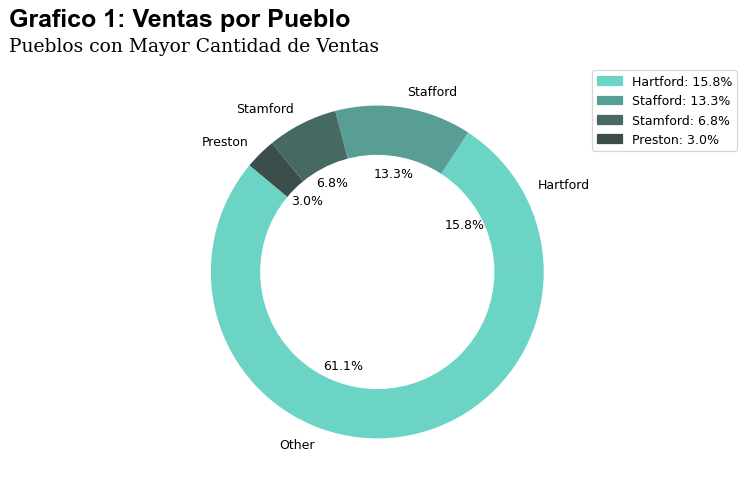

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6.9), dpi=90)

top_count = 4

estilo = df_ler_Propiedades.groupby(['town'])['salesRatio'].mean()

top_property_types = estilo.nlargest(top_count)

other_sum = estilo.nsmallest(len(estilo) - top_count).sum()

combined_data = pd.concat([top_property_types, pd.Series({'Other': other_sum})])

names = combined_data.index.tolist()

circulo = plt.Circle((0, 0), 0.7, color='white')


bar_colors = ["#6cd4c5", '#599e94', "#466964", "#3c4e4b"]
wedges, texts, autotexts = ax.pie(
    combined_data, labels=combined_data.index.tolist(), colors=bar_colors, autopct='%1.1f%%', pctdistance=0.60
)


legend_patches = []
for name, color, pct in zip(names, bar_colors, autotexts):
    legend_text = f"{name}: {pct.get_text()}"
    legend_patches.append(mpatches.Patch(color=color, label=legend_text))

ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1))

title = "Grafico 1: Ventas por Pueblo"
plt.suptitle(
    title,
    horizontalalignment='left',
    x=0.001,
    y=0.87,
    transform=fig.transFigure,
    fontsize=20,
    fontweight="bold",
    fontfamily="serif",
    fontname="Arial",
)

subTitle = "Pueblos con Mayor Cantidad de Ventas"
ax.set_title(
    subTitle,
    horizontalalignment="left",
    x=0.001,
    y=0.80,
    transform=fig.transFigure,
    fontsize=15,
    fontweight="regular",
    fontfamily="serif",
)

plt.subplots_adjust(top=0.78)

p = plt.gcf()
p.gca().add_artist(circulo)

plt.show()

<h3 style="color: #6cd4c5">
    ¿Qué tipo de propiedad tiene mayor facilidad de venta?
</h3>

<h3 style="color: #6cd4c5">
    ¿Cuál es el costo promedio de las propiedades residenciales y comerciales?
</h3>

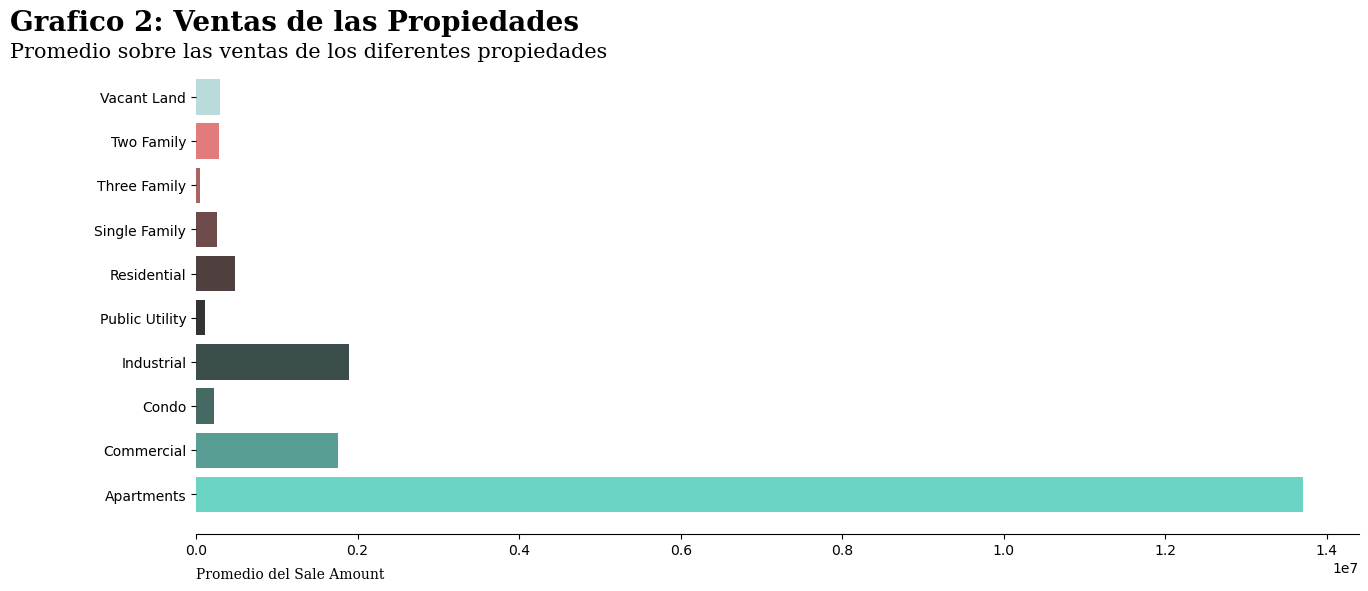

In [42]:
fig, ax = plt.subplots(1,1, figsize =(15,6.9), dpi=100)
 
eje_x = propIncome.index.tolist()
data = propIncome.tolist()
 
bar_colors = ["#6cd4c5", '#599e94', "#466964", "#3c4e4b", "#333333", "#503f3f", "#6d4b4b", "#a86464", "#e27c7c", "#badbdb"]
 
ax.barh(eje_x, data, color=bar_colors)

 
title = "Grafico 2: Ventas de las Propiedades"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             fontname = "serif")
 

subTitle = "Promedio sobre las ventas de los diferentes propiedades"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")
 
etiqueta = "Promedio del Sale Amount"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")
 
ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)
 
ax.tick_params(axis='both', labelsize = 10)
 
plt.subplots_adjust(top = 0.80)
 
plt.show()

<h3 style="color: #6cd4c5">
    5. ¿Cuáles son los tipo de propiedades residenciales que se vende con mayor frecuencia, donde y con que costo promedio?
</h3>

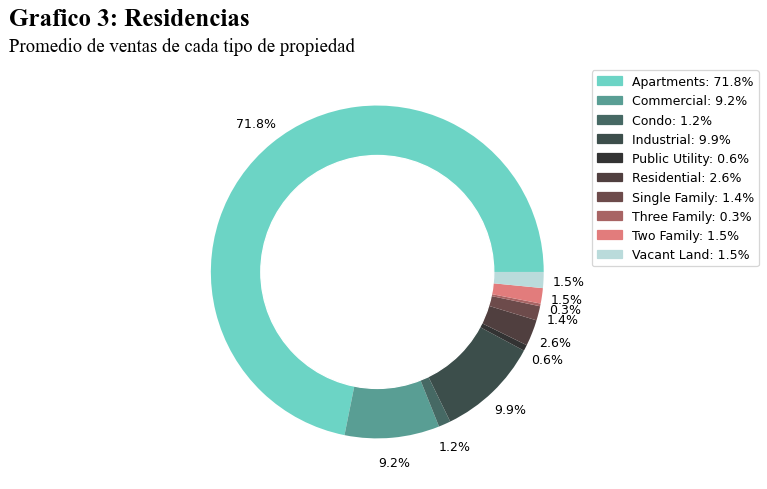

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6.9), dpi=90)
estilo = df_ler_Propiedades.groupby(['propertyType'])['saleAmount'].mean()

names = estilo.index.tolist()

circulo = plt.Circle((0, 0), 0.7, color='white')

bar_colors = ["#6cd4c5", '#599e94', "#466964", "#3c4e4b", "#333333", "#503f3f", "#6d4b4b", "#a86464", "#e27c7c", "#badbdb"]
wedges, texts, autotexts = ax.pie(
    estilo, labels=[None] * len(names), colors=bar_colors, autopct='%1.1f%%', pctdistance=1.15
)


legend_patches = []
for name, color, pct in zip(names, bar_colors, autotexts):
    legend_text = f"{name}: {pct.get_text()}"
    legend_patches.append(mpatches.Patch(color=color, label=legend_text))

ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1))

title = "Grafico 3: Residencias"
plt.suptitle(
    title,
    horizontalalignment='left',
    x=0.001,
    y=0.87,
    transform=fig.transFigure,
    fontsize=20,
    fontweight="bold",
    fontfamily="serif",
    fontname="Times New Roman",
)

subTitle = "Promedio de ventas de cada tipo de propiedad"
ax.set_title(
    subTitle,
    horizontalalignment="left",
    x=0.001,
    y=0.80,
    transform=fig.transFigure,
    fontsize=15,
    fontweight="regular",
    fontfamily="serif",
    fontname="Times New Roman"
)

plt.subplots_adjust(top=0.78)

p = plt.gcf()
p.gca().add_artist(circulo)

plt.show()